In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
from matplotlib import style
style.use('ggplot')
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from wordcloud import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer                   
from sklearn.model_selection import train_test_split  

In [2]:
df = pd.read_csv('Amazon Dataset.csv')
df.head()

,Element name,Description,Data type,Character length,Acceptable Values,Required,Accepts null
0,HS_data,GeoScout Holland Scientific data logger record...,serial,NaN,NaN,NaN,NaN
1,LONGITUDE,GPS global meridian coordinate in decimal degrees,float,13.0,-ddd.mmmmmm,y,y
2,LATITUDE,GPS global parallel coordinate in decimal degrees,float,10.0,dd.mmmmmmm,y,y
3,ELEVATION,GPS meters above sea-level geoid,float,5.0,x.x,y,y
4,FIX_TYPE,GPS signal indication 2=WASS DGPS for better a...,integer,1.0,1 to 2,n,y


In [3]:
df.shape

(60, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Element name       60 non-null     object 
 1   Description        60 non-null     object 
 2   Data type          59 non-null     object 
 3   Character length   57 non-null     float64
 4   Acceptable Values  57 non-null     object 
 5   Required           57 non-null     object 
 6   Accepts null       57 non-null     object 
dtypes: float64(1), object(6)
memory usage: 3.4+ KB


In [9]:
# to display statsabount data
df.describe()

,Character length
count,57.000000
mean,18.122807
std,56.395311
min,1.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,255.000000


In [10]:
df.describe().shape

(8, 1)

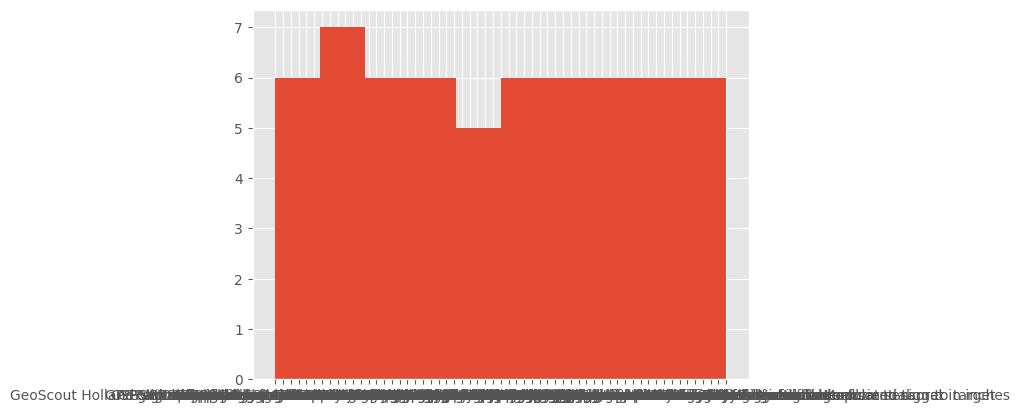

In [22]:
# histograms
df['Description'].hist()
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

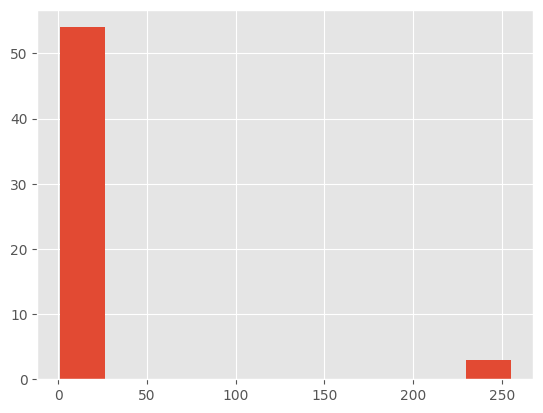

In [19]:
# histograms
df['Character length'].hist()
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

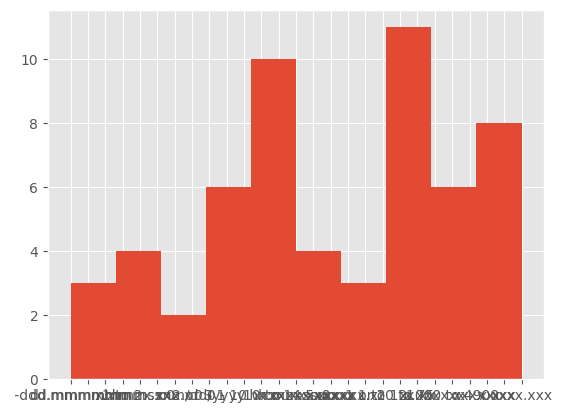

In [28]:
# histograms
df['Acceptable Values'].hist()
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

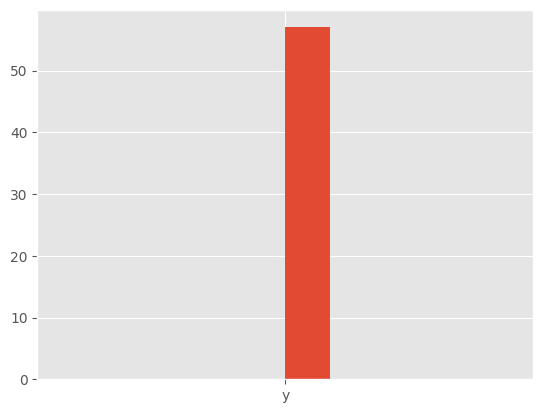

In [25]:
# histograms
df['Accepts null'].hist()
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_coun

In [39]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [40]:
df['Data type'] = df['Description'].apply(no_of_words)

In [41]:
df.head()

,Element name,Description,Data type,Character length,Acceptable Values,Required,Accepts null
0,HS_data,GeoScout Holland Scientific data logger record...,9,NaN,NaN,NaN,NaN
1,LONGITUDE,GPS global meridian coordinate in decimal degrees,7,13.0,-ddd.mmmmmm,y,y
2,LATITUDE,GPS global parallel coordinate in decimal degrees,7,10.0,dd.mmmmmmm,y,y
3,ELEVATION,GPS meters above sea-level geoid,5,5.0,x.x,y,y
4,FIX_TYPE,GPS signal indication 2=WASS DGPS for better a...,8,1.0,1 to 2,n,y


In [42]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '',text)
    text = re.sub(r"http\S+www\S+https\S+", '',text,flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '',text)
    text = re.sub(r'[\w\s]', '',text)
    text_tokens = word_tokenize(text)
    filtered_text =[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [43]:
df['Data type'] = df['Description'].apply(no_of_words)

In [44]:
df['Data type'] = df['Description'].apply(no_of_words)
df.head()


,Element name,Description,Data type,Character length,Acceptable Values,Required,Accepts null
0,HS_data,GeoScout Holland Scientific data logger record...,9,NaN,NaN,NaN,NaN
1,LONGITUDE,GPS global meridian coordinate in decimal degrees,7,13.0,-ddd.mmmmmm,y,y
2,LATITUDE,GPS global parallel coordinate in decimal degrees,7,10.0,dd.mmmmmmm,y,y
3,ELEVATION,GPS meters above sea-level geoid,5,5.0,x.x,y,y
4,FIX_TYPE,GPS signal indication 2=WASS DGPS for better a...,8,1.0,1 to 2,n,y


In [45]:
duplicated_count = df.duplicated().sum()
print('Number of duplicate enteries: ',duplicated_count)

Number of duplicate enteries:  0


In [46]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [49]:
df.Description= df['Description'].apply(lambda x: stemming(x))

In [51]:
df['Description'] = df['Description'].apply(no_of_words)
df.head()

,Element name,Description,Data type,Character length,Acceptable Values,Required,Accepts null
0,HS_data,9,9,NaN,NaN,NaN,NaN
1,LONGITUDE,7,7,13.0,-ddd.mmmmmm,y,y
2,LATITUDE,7,7,10.0,dd.mmmmmmm,y,y
3,ELEVATION,5,5,5.0,x.x,y,y
4,FIX_TYPE,8,8,1.0,1 to 2,n,y


In [57]:
from collections import Counter
count = Counter()
for text in pos_Description['Description'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[]